In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Alternative methods

```
model = np.poly1d(np.polyfit(X,y,degree))
slope, intercept, r, p, std_error = stats.linregress(X, y)
```

## Data Preparation

In [124]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\poly.csv")
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [125]:
X = df[['x']].values
y = df.y.values

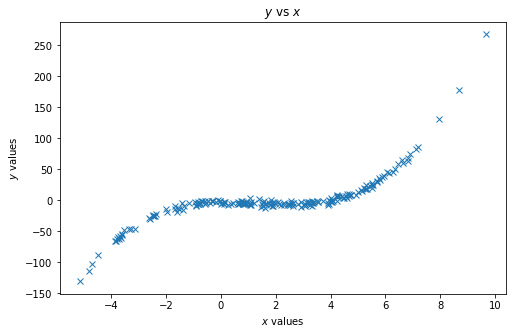

In [126]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=22)

## Linear Regression

In [128]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_lin_pred = lreg.predict(X_test)
R2_score = lreg.score(X_test,y_test)
MSEl = mean_squared_error(y_test,y_lin_pred)
print(f"{'Linear R2 Score':<16}: {R2_score:>5.4f}")
print(f"{'Linear MSE Score':<16}: {MSEl:>5.2f}")

idx = np.argsort(X_test[:,0])
x_test = X_test[idx]
y_lin_pred = y_lin_pred[idx]

Linear R2 Score : 0.5352
Linear MSE Score: 1355.63


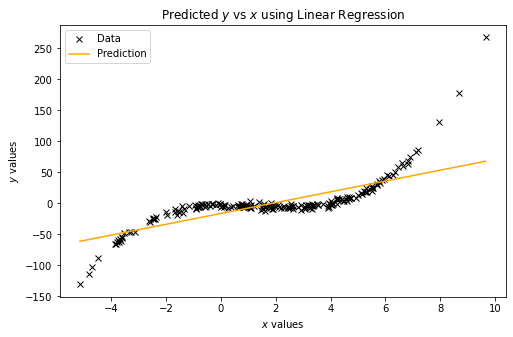

In [129]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X,y,'kx',label="Data")
ax.plot(x_test,y_lin_pred,ls='-',c='orange', label="Prediction")
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('Predicted $y$ vs $x$ using Linear Regression')
plt.legend()
plt.show()

## Polynomial Regression

In [130]:
n=3
poly = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test= poly.fit_transform(X_test)

lreg2 = LinearRegression()
lreg2.fit(X_poly_train,y_train)

y_poly_pred = lreg2.predict(X_poly_test)
R2_poly_score = lreg2.score(X_poly_test,y_test)
MSEp = mean_squared_error(y_test,y_poly_pred)
print(f"{'Polynomial R2 Score':<20}: {R2_poly_score:>2.4f}")
print(f"{'Polynomial MSE Score':<20}: {MSEp:>2.2f}")

Polynomial R2 Score : 0.9976
Polynomial MSE Score: 6.94


In [131]:
idx = np.argsort(X_test[:,0])
X_test = X_test[idx]
y_test = y_test[idx]
# y_lin_pred = y_lin_pred[idx]
y_poly_pred = y_poly_pred[idx]


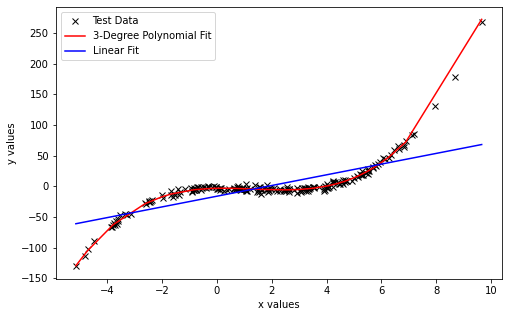

In [132]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, y, 'kx', label="Test Data")
ax.plot(X_test, y_poly_pred, ls='-',c='red', label=f"{n}-Degree Polynomial Fit")
ax.plot(X_test, y_lin_pred, ls='-',c='blue', label='Linear Fit')
ax.set_xlabel("x values")
ax.set_ylabel("y values")
plt.legend()
plt.show()

In [133]:
# Calculate the residual values for the polynomial model
poly_residuals = y_test - y_poly_pred

# Calculate the residual values for the linear model
lin_residuals = y_test - y_lin_pred


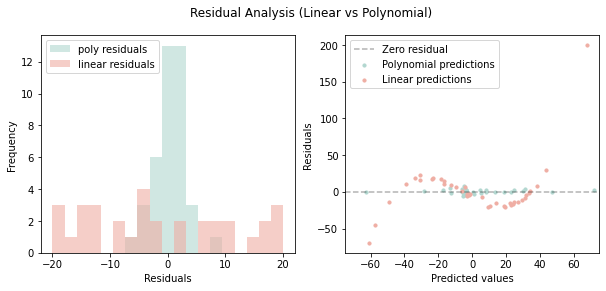

In [134]:
# Helper code to plot the residual values
# Plot the histograms of the residuals for the two cases

# Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins, label = 'poly residuals', color='#B2D7D0', alpha=0.6)

# Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'linear residuals', color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].hlines(0,-75,75, color='k', ls='--', alpha=0.3, label='Zero residual')
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s=10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')
fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show()